0       0.500000
1       0.500000
2       0.500000
3       0.500000
4       0.500000
          ...   
4893    0.500000
4894    0.333333
4895    0.500000
4896    0.666667
4897    0.500000
Name: quality, Length: 4898, dtype: float64
0.021030272546737037
0.14501818005594


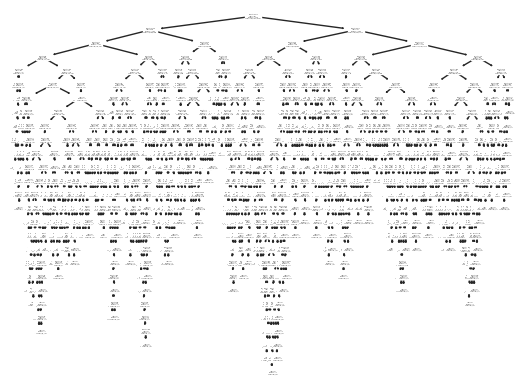

              precision    recall  f1-score   support

         bad       0.32      0.43      0.37        28
        good       0.65      0.67      0.66       350
      medium       0.79      0.76      0.77       602

    accuracy                           0.72       980
   macro avg       0.59      0.62      0.60       980
weighted avg       0.72      0.72      0.72       980

[[ 12   4  12]
 [  2 236 112]
 [ 23 124 455]]


In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import tree

wine = pd.read_csv('https://peter.butka.website.tuke.sk/test/winequality.csv')
wine.head(10)

sns.countplot(wine, x="quality")

wine1 = wine.copy()

scaler = MinMaxScaler()
wine1['quality'] = scaler.fit_transform(wine1[['quality']])

print(wine1['quality'])

wine1[['fixed acidity' ,'volatile acidity','citric acid','free sulfur dioxide','total sulfur dioxide']].corr()

train, test = train_test_split(wine1, train_size=0.9)

X_train = train[['citric acid','fixed acidity','volatile acidity']]
Y_train = train['quality']

X_test = test[['citric acid','fixed acidity','volatile acidity']]
Y_test = test['quality']

model = LinearRegression()
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

print(mse(Y_test,Y_pred))
print(np.sqrt(mse(Y_test,Y_pred)))

wine2 = wine.copy()

wine2['quality'] = pd.cut(wine2['quality'], 3, labels=["good", "medium", "bad"])

train2, test2 = train_test_split(wine2, train_size=0.8)

X_train2 = train2[['alcohol','pH','sulphates', 'residual sugar']]
Y_train2 = train2['quality']

X_test2 = test2[['alcohol','pH','sulphates', 'residual sugar']]
Y_test2 = test2['quality']

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train2, Y_train2)

plt.show(tree.plot_tree(clf))

Y_pred2 = clf.predict(X_test2)

print(classification_report(Y_test2, Y_pred2))
print(confusion_matrix(Y_test2, Y_pred2))